# Data spaces thesis
## Andrea Settimo 262710
## Leonardo Tolomei 267638
___________________________________________________________________________________________________________________

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree


## Table of Contents:

- 1 [The Forest Fires Data Set](#1)<br>
- 2 [Data Analysis](#2)<br>
    - 2.1 [Content of the dataset](#2.1)<br>
    - 2.2 [The meaning of features](#2.2)<br>
    - 2.3 [Basic statistics](#2.3)<br>
    - 2.4 [Missing values](#2.4)<br>
    - 2.5 [Features distributions](#2.5)<br>
        - 2.5.1 [Categorical features](#2.5.1)<br>
        - 2.5.2 [Numerical features](#2.5.2)<br>
    - 2.6 [Data encoding](#2.6)<br>
    - 2.7 [Correlation Matrix](#2.7)<br>
    - 2.8 [Target analysis](#2.8)<br>
- 3 [Pre-Processing](#3)<br>
    - 3.1 [Division of prediction features](#3.1)<br>
    - 3.2 [Dataset partirion](#3.2)<br>
    - 3.3 [Normalization](#3.3)<br>
    - 3.4 [Features reduction](#3.4)<br>
    - 3.5 [PCA](#3.5)<br>
- 4 [Model Generation](#4)<br>
    - 4.1 [Validation procedure](#4.1)<br>
    - 4.2 [Trainig procedure](#4.2)<br>
    - 4.3 [Metrics](#4.3)<br>
    - 4.4 [Models](#4.4)<br>
        - 4.4.1 [Linear Regression](#4.4.1)<br>
        - 4.4.2 [Regression Tree](#4.4.2)<br>
        - 4.4.3 [Random Forest](#4.4.3)<br>
        - 4.4.4 [SVR](#4.4.4)<br>
        - 4.4.5 [K-NN](#4.4.5)<br>
    - 4.5 [Results](#4.5)<br>
        - 4.5.1 [PCA](#4.5.1)<br>
        - 4.5.2 [Non-PCA](#4.5.2)<br>
- 5 [Features selection](#5)<br>
    - 5.1 [STFWI](#5.1)<br>
    - 5.2 [STM](#5.2)<br>
    - 5.3 [FWI](#5.3)<br>
    - 5.4 [Weather Conditions](#5.4)<br>
- 6 [Conclusions](#6)

___________________________________________________________________________________________________________________

## 1. The Forest Fires Data Set <a class="anchor" id="1"></a>

In this thesis, the analysis is based on Forest Fires Data Set, which is a dataset of wildfires occurrences of Montesinho natural park, from the Tràs-os-Montes northeast region of Portugal. It is available at:
http://archive.ics.uci.edu/ml/datasets/Forest+Fires.

The research group that created this dataset, was looking for an effective and cheap way to automatically predict the burnt area of a wildfire, starting from data coming from different sources: historical spacial and temporal data, Fire Weather Index (FWI) and its components, and metereological local sensors.

Here are a few samples taken from the dataset:

In [2]:
df = pd.read_csv("./Dataset/forestfires.csv")
df.head()                                      # Shows the first five rows.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


___________________________________________________________________________________________________________________

## 2. Data Analysis <a class="anchor" id="2"></a>

### 2.1 Content of the dataset <a class="anchor" id="2.1"></a>

The dataset size is:

In [3]:
print(df.shape)
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])

(517, 13)
Number of samples: 517
Number of features: 13


The dataset features are:

In [4]:
featureNames = list(df)
print(featureNames)

['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


### 2.2 The meaning of features <a class="anchor" id="2.2"></a>

1. X: x-axis spatial coordinate within the Montesinho park map: 1 to 9;
2. Y: y-axis spatial coordinate within the Montesinho park map: 2 to 9;
3. month: month of the year: 'jan' to 'dec'; 
4. day: day of the week: 'mon' to 'sun';
5. FFMC: Fine Fuel Moisture Code index (FFMC) from the FWI system: 18.7 to 96.20; 
6. DMC: Duff Moisture Code (DMC) index from the FWI system: 1.1 to 291.3; 
7. DC: Drought Code (DC) index from the FWI system: 7.9 to 860.6;
8. ISI: Initial Spread Index (ISI) index from the FWI system: 0.0 to 56.10; 
9. temp: temperature in Celsius degrees: 2.2 to 33.30;
10. RH: relative humidity in %: 15.0 to 100; 
11. wind: wind speed in km/h: 0.40 to 9.40;
12. rain: outside rain in mm/m2 : 0.0 to 6.4;
13. area: the burned area of the forest (in ha): 0.00 to 1090.84 (this feature is the target).

### 2.3 Basic statistics <a class="anchor" id="2.3"></a>

We can generate some statistics from the dataset. A basic statistic is generated using the "describe" method which provides some summuries:
- count: the number of elements present in each feature;
- mean: the average of a feature;
- std: the standard deviation of observation;
- min: the minimum value of the feature;
- 25%: the 25 percentile;
- 50%: the 50 percentile;
- 75%: the 75 percentile;
- max: the maximum value of the feature.

Below is reported the summary table with the data:

In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### 2.4 Missing values <a class="anchor" id="2.4"></a>

For the correct implementation of algorithms is important to know if there are missing values in the dataset. If they were present, a correction to avoid the problem would be needed.

In [6]:
missing = df.isnull().sum()

if missing.sum() == 0:
    print("\nIn this dataset there are no missing values.\n")
else:
    print(f"\nIn this dataset there are some missing values:\n{missing}")


In this dataset there are no missing values.



### 2.5 Features distributions <a class="anchor" id="2.5"></a>

We can visualize the distributions of features within the dataset.

Categorical and numerical features are treated separately.

In [7]:
features = df.drop(columns="area")
cat_columns = features.select_dtypes(include='object').columns.tolist()
num_columns = features.select_dtypes(exclude='object').columns.tolist()

#### 2.5.1 Categorical features <a class="anchor" id="2.5.1"></a>

Month and day are the only categorical features.

For both of them, an histogram representation of value frequencies is plotted.

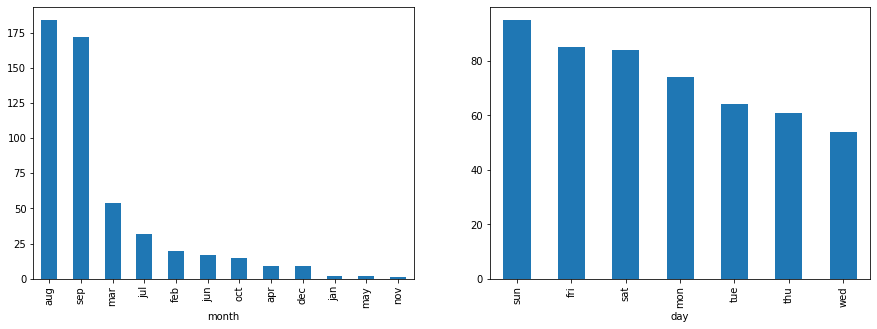

In [8]:
plt.figure(figsize=(15,5))
for i,col in enumerate(cat_columns,1):
    plt.subplot(1,2,i)
    df[col].value_counts().plot.bar()
    plt.xlabel(col)
plt.show()

#### 2.5.2 Numerical features  <a class="anchor" id="2.5.2"></a>

Remaining features are all numerical. So, for each of them, a density graph and a box plot were plotted.

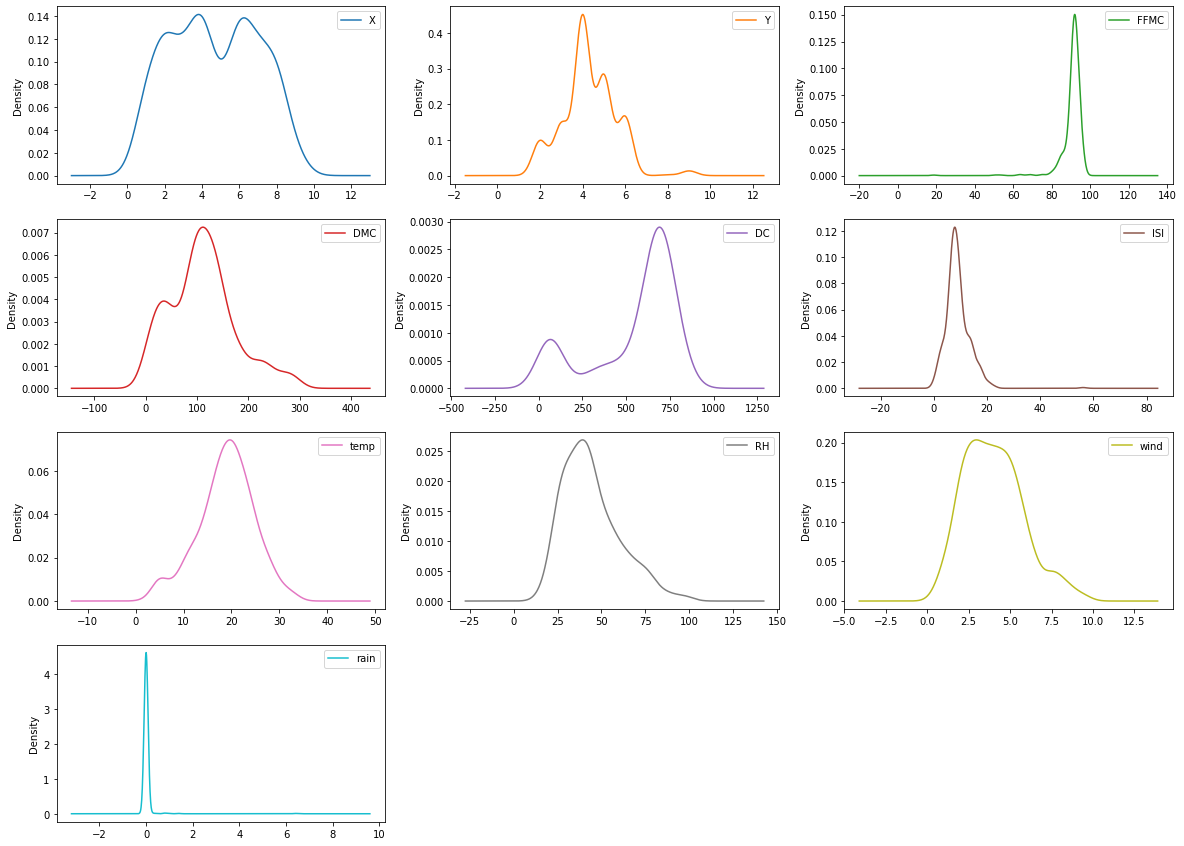

In [9]:
features.plot(kind='density', subplots=True, layout=(4,3), figsize=(20,15), sharex=False, sharey=False)
plt.show()

Box plots are a very compact and effective representation of data distributions. They can visualize a summary of important statistical numbers and also highlight possible outliers. A more detailed description of the representation method is shown in the following image:

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="boxplot" style="width:500px;" />

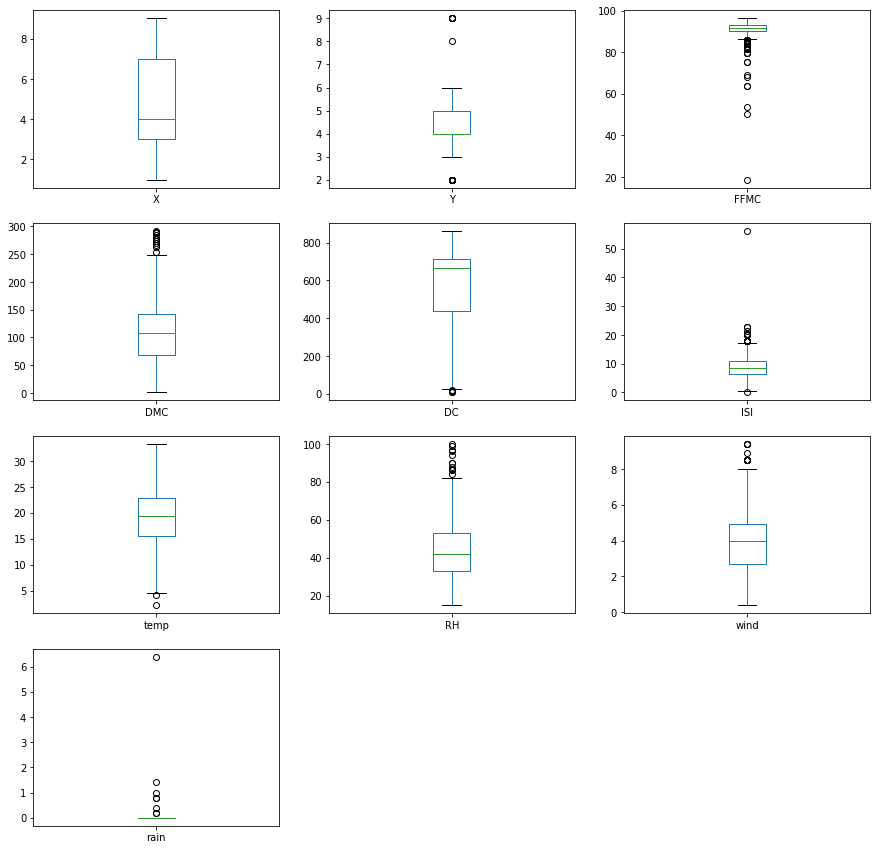

In [10]:
features.plot(kind='box', subplots=True, layout=(4,3), figsize=(15,15), sharex=False, sharey=False)
plt.show()

### 2.6 Data encoding <a class="anchor" id="2.6"></a>

In order to complete data analysis and to apply data mining algorithms, some pre-processing is required. In particular, for all algorithms except for Decision Tree and Random Forest, categorical features are transformed through a 1-of-C encoding (a.k.a. "dummy" encoding). This type of transformation converts a categorical feature with N possible values into N binary features, with one of them equal to 1 and all others equal to 0 for each sample.

Moreover, original categorical features are converted to ordinal integers, to be able to use library functions for Decision Tree and Random Forest.

In [11]:
df['day'] = pd.Categorical(df['day'])
df['month'] = pd.Categorical(df['month'])

day_dummies = pd.get_dummies(df['day'], prefix="day")
month_dummies = pd.get_dummies(df['month'], prefix="month")

df_dummy = df.drop(['day', 'month'], axis=1)
df_dummy = pd.concat([df_dummy, day_dummies, month_dummies], axis=1)

le = LabelEncoder()
df['day'] = le.fit_transform(df['day'])
df['month'] = le.fit_transform(df['month'])

Non-encoded dataset:

In [12]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Encoded dataset:

In [13]:
df_dummy.head(5)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


### 2.7 Correlation Matrix <a class="anchor" id="2.7"></a>

The correlation allows us to see the relationship between two statistical variables X and Y. It takes into account the definition of covariance, which also calculates the relationship between two statistical variables, but the correlation represents the relationship in a range of values between -1 and 1. This is possible because it divides the covariance value by the standard deviation value.


Definition of covariance between two statistical variables X and Y:

\begin{equation*}
cov(X, Y) = E[(X - \mu_x)(Y - \mu_y)] = E[XY] - E[X]E[Y] = E[XY] - \mu_x\mu_y
\end{equation*}

Instead, in case of two equal statistical variables:

\begin{equation*}
cov(X, X) = Var(X) = \sigma^2(X) = \sigma^2_X 
\end{equation*}

So we can define Pearson's correlation between two statistical variables X and Y as:

\begin{equation*}
\rho_{XY} = \frac{cov(X, Y)}{\sigma_X\sigma_Y}
\end{equation*}

Instead, in case of two equal statistical variables, we can get:

\begin{equation*}
\rho_{XX} = \frac{cov(X, X)}{\sigma_X\sigma_X} = \frac{\sigma_X^2}{\sigma_X\sigma_X} = \frac{\sigma_X^2}{\sigma_X^2} = 1
\end{equation*}

We can also give meaning to these values:
- if $\rho_{XY} > 0$, the variables $X$ and $Y$ are said to be directly related; 
- if $\rho_{XY} = 0$, the variables $X$ and $Y$ are said to be uncorrelated; 
- if $\rho_{XY} < 0$, the variables $X$ and $Y$ are said to be inversely related.

So our correlation matrix is defined simply as:

\begin{equation*}
\rho_{ij} = \frac{cov(X_i, X_j)}{\sigma_{X_i}\sigma_{X_j}}
\end{equation*}

Where X is our dataset, i and j are related to the features being evaluated.
We can see that our final matrix will be symmetric ($\rho_{ij} = \rho_{ji}$) and the coefficients on the diagonal will be equal to 1.



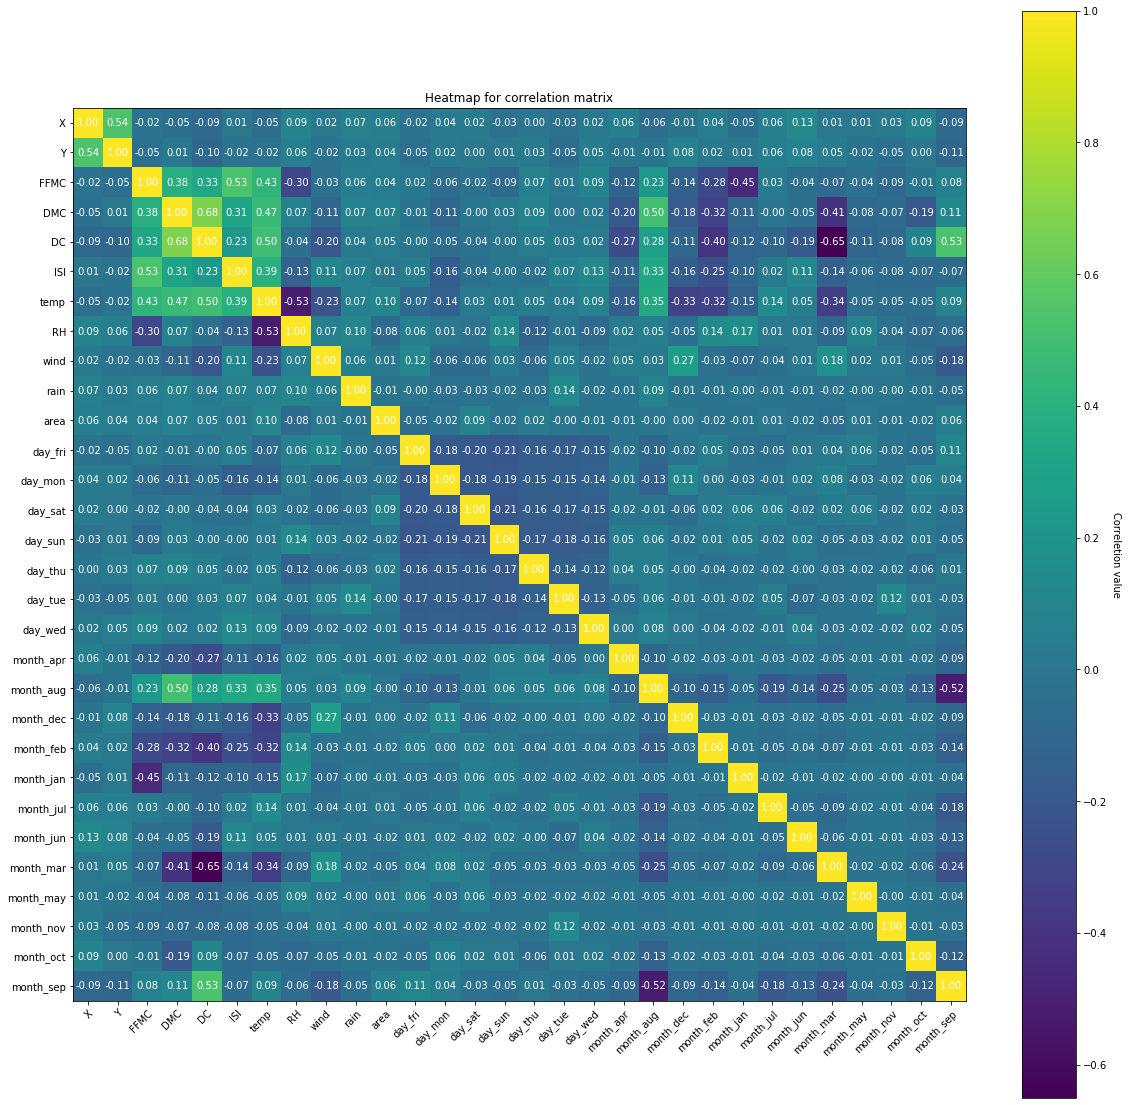

In [14]:
correlations = df_dummy.corr()
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(correlations)
ax.set_xticks(np.arange(df_dummy.shape[1]))
ax.set_yticks(np.arange(df_dummy.shape[1]))
# label them with the respective list entries
ax.set_xticklabels(list(df_dummy.columns))
ax.set_yticklabels(list(df_dummy.columns))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(df_dummy.shape[1]):
    for j in range(df_dummy.shape[1]):
        text = ax.text(j, i, "{0:.2f}".format(correlations.iloc[i, j]), ha="center", va="center", color="w")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correletion value", rotation=-90, va="bottom")

ax.set_title("Heatmap for correlation matrix")
plt.show()


### 2.8 Target analysis <a class="anchor" id="2.8"></a>

The target of this dataset is the burnt area in ha.

Note that a zero value means an area lower than: \begin{equation*}\frac{1ha}{100} = 100m^2\end{equation*}

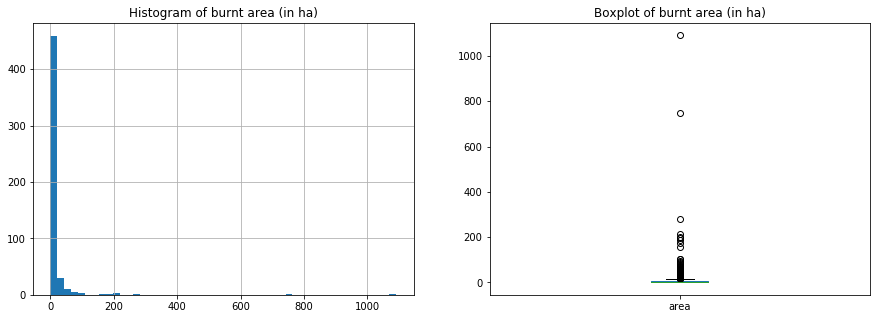

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['area'].hist(bins=50)
plt.title('Histogram of burnt area (in ha)')
plt.subplot(1,2,2)
df['area'].plot(kind="box")
plt.title('Boxplot of burnt area (in ha)')
plt.show()

Burnt area is very skewed, with the majority of the fires presenting a small size. So, the logarithm function can be applied to reduce skewness and improve symmetry.

More precisely, the transformation

\begin{equation*}
t(x) = \ln{(x+1)}
\end{equation*}

can be applied and model predictions will need to be post-processed with the inverse transformation:

\begin{equation*}
t^{-1}(x) = e^x-1
\end{equation*}

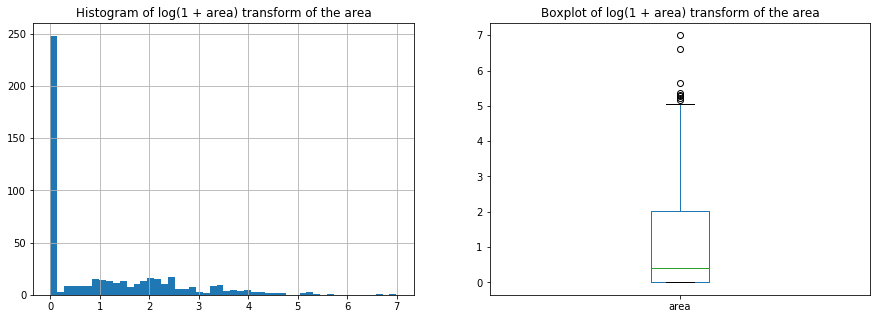

In [16]:
df_dummy['area'] = df['area'] = np.log1p(df['area'])

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['area'].hist(bins=50)
plt.title('Histogram of log(1 + area) transform of the area')
plt.subplot(1,2,2)
df['area'].plot(kind="box")
plt.title('Boxplot of log(1 + area) transform of the area')
plt.show()

___________________________________________________________________________________________

## 3. Pre-Processing <a class="anchor" id="3"></a>

### 3.1 Division of prediction features <a class="anchor" id="3.1"></a>

The first thing to do is to divide the column representing the target from the rest of the columns.
The target value is used to perform the learning of the model and also the test on it. In our dataset, the target value is represented by the area feature.

In [17]:
# X not encoded for Decision Tree and Random Forest
X_DT = df.drop(columns=['area']).values
# X encoded for remaining algorithms
X = df_dummy.drop(columns=['area']).values

Y = df['area'].values

### 3.2 Dataset partition <a class="anchor" id="3.2"></a>

During the study of the various models we must understand how the newly generated models can perform on data they have never seen.
To do this, we can divide the dataset into two parts:
- Training set: is the set where our model goes to learn;
- Test set: is the part of dataset where we can evaluate our models. 

To do this we have to define which parameter is best for splitting the training set and the test set. One possible solution is to take a set of values (which is the split proportion) and try them with the algorithms that we are going to use on our training set. We will choose the proportion that will give a better result on the test.
The various attempts made, showed that the best proportion found is 50% of data for the training set and 50% of data for the test set.

The division is implemented using the train_test_split library function which, given a proportion for test set size compared to that of training, returns the divided dataset.

<img src="img/size training e test.png" alt="boxplot" style="width:50%;" />

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.50, random_state=0)
X_train_DT, X_test_DT, Y_train_DT, Y_test_DT = train_test_split( X_DT, Y, test_size=0.50, random_state=0)

print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_test))

The size of the training set is: 258
The size of the test set is: 259


### 3.3 Normalization <a class="anchor" id="3.3"></a>

Normalization is a type of data transformation, whose values are adapted into a smaller range of numeric values, typically a range between [-1, 1] or [0, 1] is used. It is used in attributes to have the same reference scale because it is useful in the concept of distance.
In this case the z-score transformation can be chosen and it is defined as:
\begin{equation*}
z = \frac{X - μ}{σ}
\end{equation*}

Using the SandardScaler library class, we can calculate the transformation using the fit method on the training set (result of the division of the previous step) and then apply the changes on the training set and test set.

Also this transformation was applied to all algorithms except for Decision Tree and Random Forest, which do not explicitly need it.

In [19]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Pre-compute post-processed Ys
Y_train_post = np.expm1(Y_train)
Y_test_post = np.expm1(Y_test)
Y_train_post_DT = np.expm1(Y_train_DT)
Y_test_post_DT = np.expm1(Y_test_DT)

Scrivere qualcosa... 

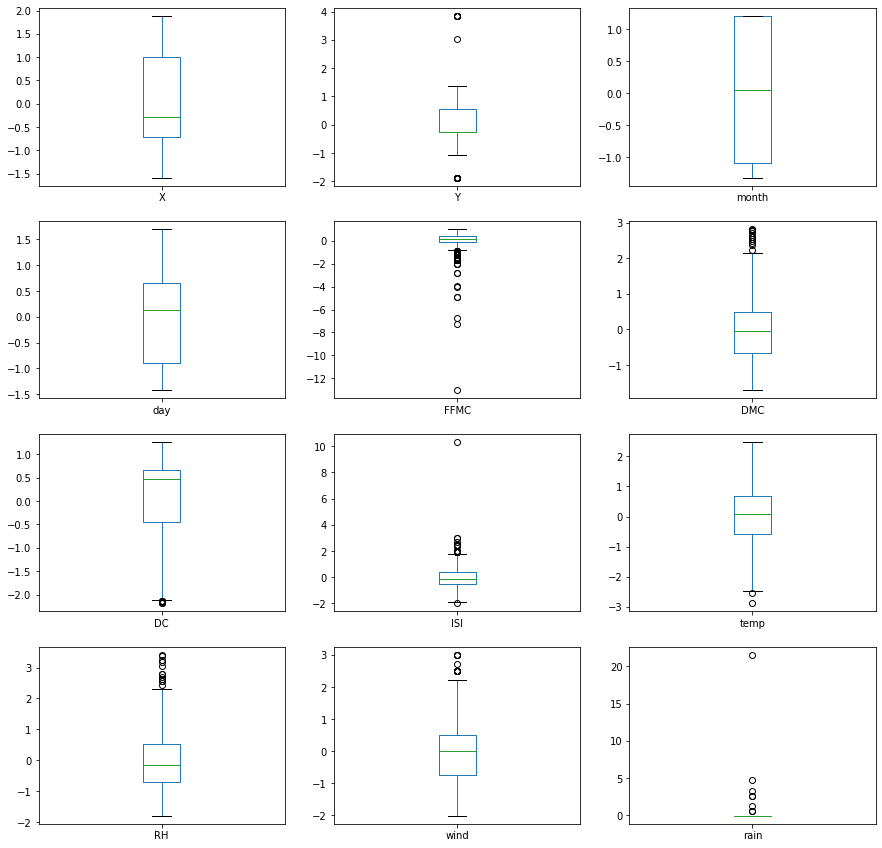

In [21]:
features = df.drop(columns="area")
features[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']] = scaler.fit_transform(features[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']])
features.plot(kind='box', subplots=True, layout=(4,3), figsize=(15,15), sharex=False, sharey=False)
plt.show()

____________________________________________________________________

### 3.4 Features reduction <a class="anchor" id="3.4"></a>

When we have many features we can run into a performance and memory space problem. It must be considered that not all features are relevant to the problem to be solved, to select which features to use two techniques can be used:

- Dimensionality reduction: it is based on mathematical techniques that allow the recombination of the original features (e.g: PCA, Fisher LDA).
- Feature selection: it is based on taking a subset of features. From a mathematical point of view it means designing the points in a new space called feature space.

### 3.5 PCA <a class="anchor" id="3.5"></a>

Principal Component Analysis is a decomposition technique that extracts from a multivariate dataset a set of successive orthogonal components that explain a maximum amount of variance.

In other words, it is an approximation of the dataset in a lower dimensional space, preserving largest variances in the data.

In [22]:
def plotPCACumulativeExplainedVariance(pca):
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='orange')
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.title('Explained variance by different principal components')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance in percent');

In [23]:
def makePCA(X_train_, X_test_):
    pca = PCA(n_components=.95)
    pca.fit(X_train_)
    X_train_pca_ = pca.transform(X_train_)
    X_test_pca_ = pca.transform(X_test_)
    plotPCACumulativeExplainedVariance(pca)
    return X_train_pca_, X_test_pca_

At this point, two training dataset version are present: one is similar to the original dataset, and is dedicated to Decision Tree and Random Forest; the other is encoded and normalized, and is dedicated to all other algorithms.

Each time PCA is applyed to these two dataset versions, two graphs are plotted. Each graph contains a bar plot for individual explained variance and a line plot for cumulative explained variance. The individual explained variance is the variance explained by a single component in percentage, and the cumulative explained variance is the cumulative sum of these percentages.

Components are ordered in terms of variance, showing how the algorithm proceeded during the selection. The plot stops at 95% of cumulative variance, which is the target variance that we selected.

PCA result on encoded dataset:

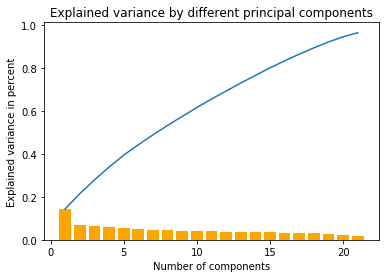

In [24]:
X_train_pca, X_test_pca = makePCA(X_train, X_test)

PCA result on non-encoded dataset (for Decision Tree and Random Forest):

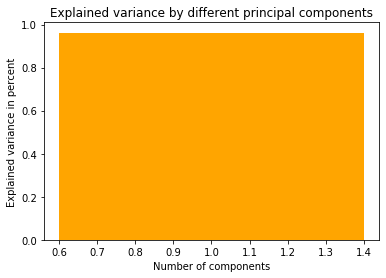

In [25]:
X_train_pca_DT, X_test_pca_DT = makePCA(X_train_DT, X_test_DT)

______________________________________________________________

## 4 Model Generation <a class="anchor" id="4"></a>

### 4.1 Validation procedure <a class="anchor" id="4.1"></a>

In order to select the hyperparameters of our algorithms we must use a validation procedure. There are two types of validation:
- Hold out: the training set is divided into two parts, one for training and another one for model validation to understand if those hyperparameters are better than others. usually for division between training and validation set the following proportion is used: ⅔ for the training and ⅓ for the validation set. This methodology is fine when you have a huge amount of data and you get a validation of the models in a fast but not very accurate way;
- K-fold: this technique allows us to validate our models more accurately. This technique allows you to generate K sets of training and validation sets that are different from each other, where each of them always uses different data within the validation set, so that the assessment of the prediction can be generalized as much as possible. In doing so, our evaluation generalizes the goodness of our model of generalizing data that it has never seen. This is a very good thing, so you can get good results when testing. Then k models are created and each of them is tested with a validitation set (relative to it) having size 1 / k of the complete trainig set. Instead, the training set used in this phase has a size equal to (k-1) / k. In this case we have decided to use this type of validation as the size of the dataset is not large. A figure is given to best summarize this technique.

<img src="img/Validation.png" alt="boxplot" style="width:100%;" />

Our analyses were carried out with a k equal to 10.

### 4.2 Training procedure <a class="anchor" id="4.2"></a>

Once the validation procedure is done, the validation and the test set are combined to be able to train with the best hyperparameters found. Once the training is over, you go to see how good your model is on data that it has never seen, so you go to test it with the test set (data that we have put aside already before).

<img src="img/Training and Test.png" alt="boxplot" style="width:75%;" />

### 4.3 Metrics <a class="anchor" id="4.3"></a>

The metrics used to evaluate our models are:
- Mean Absolute Error (MAE):

\begin{equation*}
MAE = \frac{1}{n} \sum^n_{j=1}|y_j - \hat{y_j}|
\end{equation*}

- Root mean squared error (RMSE):

\begin{equation*}
RMSE = \sqrt{\frac{1}{n} \sum^n_{j=1}(y_j - \hat{y_j})^2}
\end{equation*}




### 4.4 Models  <a class="anchor" id="4.4"></a>

#### 4.4.1 Linear Regression  <a class="anchor" id="4.4.1"></a>

This type of algorithm is the simplest that can be found in the habit of regression, it is based on a linear relationship between X and Y, but this in reality is unlikely to be possible. 
We can define our model starting from the one-dimensional case:

\begin{equation*}
Y = \beta_0 + \beta_1X + \epsilon
\end{equation*}

we must try to estimate the coefficients of the model ($\hat{\beta_0}$ and $\hat{\beta_1}$), so as to obtain an estimate of the target ($\hat{y}$).
The algorithm is based on the calculation of the residuals:

\begin{equation*}
e_i = y_i - \hat{y_i}, \ i \in n \ (number \ of \ samples)
\end{equation*}

We can define our loss functions that we have to optimize:

\begin{equation*}
Loss(\hat{y}, y) = \sum_{i}^n (y_i - \hat{\beta_0} + \hat{\beta_1}x_i)^2
\end{equation*}

This mode is called least square criterion which allows you to choose the coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the loss function.
In the multidimensional case, we can estimate p coefficients: $\hat{\beta_0},\ \hat{\beta_1},\ ...,\ \hat{\beta_p}$.
the resulting model is given by the following formulation:

\begin{equation*}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \ ...\ +\hat{\beta_p}x_p
\end{equation*}

The loss function does not change, you must always minimize taking into account the new formulation.

In [26]:
def makeLinearRegression(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    model = LinearRegression()
    model.fit(X_train_, Y_train_)
    
    Y_predict = model.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = model.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [27]:
lr_pca_RMSE, lr_pca_MAE = makeLinearRegression(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Test results:
	RMSE: 71.84598279415894
	MAE: 13.370951179694307
Train results:
	RMSE: 55.96222154484836
	MAE: 12.345167250816317


**Without PCA:**

In [28]:
lr_RMSE, lr_MAE = makeLinearRegression(X_train, Y_train, Y_train_post, X_test, Y_test_post)

Test results:
	RMSE: 71.680035682531
	MAE: 13.418297307938198
Train results:
	RMSE: 55.841130231905105
	MAE: 12.307980350053754


#### 4.4.2 Regression Tree <a class="anchor" id="4.4.2"></a>

Decision Tree is a non-parametric method used for classification and regression.

The regression version differs from the classification one for the output y, which is a floating point instead of an integer number. The result is a branching structure that represents a set of rules, distinguishing values in a hierarchical form.

Regression Trees are easy to implement and interpret, as they always produce a readable output (as shown for each run). They are only sensible to missing values, so they do not require much data preparation and they are natively able to handle categorical data. However, they easily overfit and their simplicity does not make them suitable for all kinds of problems.

For the algorithm construction, a stopping rule and a split evaluation criterion can be defined.
We adopted maximum depth as stopping rule, trying different values (i.e.: 1, 2, 3, 5, 10, 15, 20) and we tested three split evaluation criteria: MSE, Friedman MSE and MAE.

MAE was already defined in section 4.3. Also MSE is like the already defined RMSE, without the root. Friedman MSE, instead, uses MSE with Friedman's improvement score for potential splits.

In [29]:
def makeDecisionTree(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    decisionTree = GridSearchCV(estimator=DecisionTreeRegressor(),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "friedman_mse", "mae"]},
                                cv=10, iid=False)
    decisionTree.fit(X_train_, Y_train_)
    
    Y_predict = decisionTree.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = decisionTree.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    tree.plot_tree(decisionTree.best_estimator_)
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

Test results:
	RMSE: 71.99248784482458
	MAE: 13.346116373199674
Train results:
	RMSE: 56.04898957999991
	MAE: 12.582757583388192


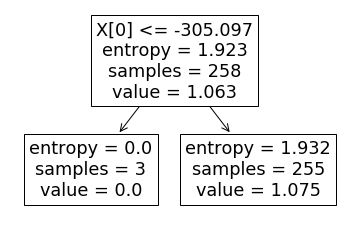

In [30]:
dt_pca_RMSE, dt_pca_MAE = makeDecisionTree(X_train_pca_DT, Y_train_DT, Y_train_post_DT, X_test_pca_DT, Y_test_post_DT)

**Without PCA:**

Test results:
	RMSE: 71.98048976073196
	MAE: 13.337320978196127
Train results:
	RMSE: 55.93433599130671
	MAE: 12.585610670993878


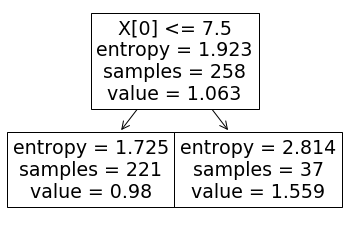

In [31]:
dt_RMSE, dt_MAE = makeDecisionTree(X_train_DT, Y_train_DT, Y_train_post_DT, X_test_DT, Y_test_post_DT)

#### 4.4.3 Random forest <a class="anchor" id="4.4.3"></a>

Random Forest is an ensamble version of the Decision Tree algorithm. It produces T unpruned Decision Trees, using random features selection from bootstrap training samples. The predictor averages the output of all the trees. It usually produces better results then a single Decision Tree, with an higher predictive accuracy and better control of over-fitting.

Also in this case, we adopted max depth as stopping criterion, and we tried different depths (i.e.: 1, 2, 3, 5, 10, 15, 20) and different split quality measures (i.e: MAE, MSE).

In [32]:
def makeRandomForest(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    randomForest = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "mae"]},
                                cv=10, iid=False, n_jobs=-1)
    randomForest.fit(X_train_, Y_train_)
    
    Y_predict = randomForest.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = randomForest.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [33]:
rf_pca_RMSE, rf_pca_MAE = makeRandomForest(X_train_pca_DT, Y_train_DT, Y_train_post_DT, X_test_pca_DT, Y_test_post_DT)

Test results:
	RMSE: 71.99201545185515
	MAE: 13.374013322547212
Train results:
	RMSE: 55.968410520588016
	MAE: 12.480842735607396


**Without PCA:**

In [34]:
rf_RMSE, rf_MAE = makeRandomForest(X_train_DT, Y_train_DT, Y_train_post_DT, X_test_DT, Y_test_post_DT)

Test results:
	RMSE: 71.98565305949576
	MAE: 13.302307062110955
Train results:
	RMSE: 55.98881427591865
	MAE: 12.540358776096044


#### 4.4.4 SVR <a class="anchor" id="4.4.4"></a>

The support vector machine (SVM) algorithm can also be used in the case of regression. 
In this case you take the mode of support vector regression and use the same concepts used in the classification.
At the end of the process you always get a maximal margin, also keeping in mind a possible error tolerance.

In this case the problem turns:

\begin{equation*}
min \ \frac{1}{2}|w|^2 + C \sum^N_i(\xi_i + \xi_i^*) \\
subject \ to:
y_i - \langle w,x_i \rangle - b < \epsilon + \xi_i; \ 
\langle w,x_i \rangle - b - y_i < \epsilon + \xi_i^*; \ 
\xi_i,\xi_i^* \geq 0
\end{equation*}

$\epsilon$: it is a margin of error, which allows you to consider the points in the margin as tolerated errors.

$\xi_i$: it is called slack variables, in the case of regression it is a value assigned to points outside the margin.

$C$: it describes how many errors are allowed during the training time. 

The image below represents the meaning of the epsilon parameter and the slack variables.

<img src="img/SVR.png" alt="boxplot" style="width:50%;" />

The mapping allows to map the points into the space where they are linearly separable and then apply the dot product. 
However, this operation can be very expensive.
Also to solve the problem and to avoid mapping points in another space, you can use the concept of kernel.
The kernel function must meet the following requirement:

\begin{equation*}
k(x, x') = \langle \phi(x), \phi(x') \rangle
\end{equation*}

Using a kernel is more efficient than mapping into another space. 
In our case we went to consider two types of kernels:
- Linear kernel:

\begin{equation*}
k(x, x') = \langle x, x' \rangle
\end{equation*}

- Residual Basis Function:

\begin{equation*}
k(x, x') = e^{-\gamma |x-x'|^2}
\end{equation*}



In [35]:
def makeSVR(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    svr = GridSearchCV(estimator=SVR(),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'epsilon': [0.01, 0.1, 1, 10, 100]},
                                cv=10, iid=False, n_jobs=-1)
    svr.fit(X_train_, Y_train_)
    
    print("Best parameters: ", svr.best_params_)
    Y_predict = svr.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = svr.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [36]:
svr_pca_RMSE, svr_pca_MAE = makeSVR(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Best parameters:  {'C': 1, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Test results:
	RMSE: 72.0084536819744
	MAE: 13.273060963443658
Train results:
	RMSE: 56.08261963179137
	MAE: 12.533765612870976


**Without PCA:**

In [37]:
svr_RMSE, svr_MAE = makeSVR(X_train, Y_train, Y_train_post, X_test, Y_test_post)


Best parameters:  {'C': 0.1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 72.0101982624336
	MAE: 13.274557403114205
Train results:
	RMSE: 56.07982522268322
	MAE: 12.53155457909518


#### 4.4.5 K-NN <a class="anchor" id="4.4.5"></a>

Also this algorithm can be extended to the case of regression. This technique allows to fix k points of the training set to evaluate the prediction.

A possible pseudo algorithm can be:

    for p in point:
    
        select k points close the point p
        
        assign:
\begin{equation*}
\hat{y}:  \hat{y} = \frac{1}{K}\sum_i^n y_i
\end{equation*}
   
As can be seen from the pseudo-algorithm, this type of model is based on the definition of distance. In our case we went to evaluate two types of distances: 
- Manhattan (p = 1);
- Euclidian (p = 2).

\begin{equation*}
L_p(x,y) = (\sum_i^d(x_i - y_i)^p)^{\frac{1}{p}}
\end{equation*}

In addition to two types of distances we went to evaluate different k values: 1, 3, 5, 7, 9, 13, 15, 17 and 19.


In [38]:
def makeKNN(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    knn = GridSearchCV(estimator=KNeighborsRegressor(),
                                param_grid={'n_neighbors': [1, 3, 5, 7, 9, 13, 15, 17, 19], 'p': [1, 2]},
                                cv=10, iid=False, n_jobs=-1)
    knn.fit(X_train_, Y_train_)
    
    Y_predict = knn.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = knn.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    return np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)), metrics.mean_absolute_error(Y_test_post_, Y_predict_post)

**With PCA:**

In [39]:
knn_pca_RMSE, knn_pca_MAE = makeKNN(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Test results:
	RMSE: 72.00850227956124
	MAE: 13.412836330186183
Train results:
	RMSE: 55.98203036842924
	MAE: 12.483389107238954


**Without PCA:**

In [40]:
knn_RMSE, knn_MAE = makeKNN(X_train, Y_train, Y_train_post, X_test, Y_test_post)

Test results:
	RMSE: 71.93590453269111
	MAE: 13.365564205654442
Train results:
	RMSE: 55.945951909323036
	MAE: 12.527647173545663


## 4.5 Results <a class="anchor" id="4.5"></a>

In [164]:
def plotResult(RMSEs, RMSEs_pca, MAEs, MAEs_pca):    
    
    labels = ['Linear Regression', 'Regression Tree', 'Random Forest', 'SVR', 'K-NN']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(8,5))
    rects1 = ax.bar(x - width/2, RMSEs, width, label='Without PCA')
    rects2 = ax.bar(x + width/2, RMSEs_pca, width, label='PCA')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title('RMSE results')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    plt.ylim(min(RMSEs) - 0.1, max(RMSEs) + 0.1)
    fig.tight_layout()

    plt.show()
    
    labels = ['Linear Regression', 'Regression Tree', 'Random Forest', 'SVR', 'K-NN']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(8,5))
    rects1 = ax.bar(x - width/2, MAEs, width, label='Without PCA', color='green')
    rects2 = ax.bar(x + width/2, MAEs_pca, width, label='PCA', color='purle')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('MAE')
    ax.set_title('MAE results')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    plt.ylim(min(MAEs) - 0.1, max(MAEs) + 0.1)
    fig.tight_layout()

    plt.show()


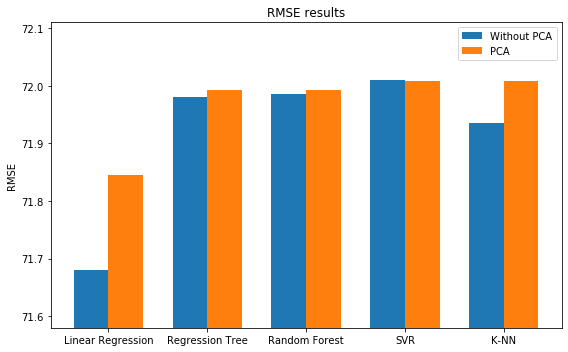

ValueError: Invalid RGBA argument: 'p'

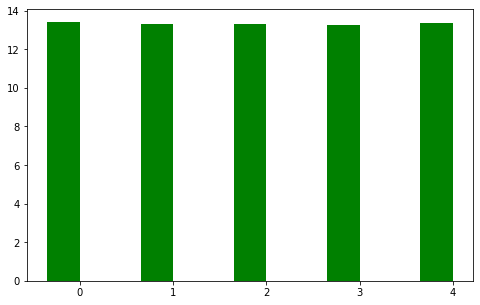

In [165]:
RMSEs = [lr_RMSE, dt_RMSE, rf_RMSE, svr_RMSE, knn_RMSE]
RMSEs_pca = [lr_pca_RMSE, dt_pca_RMSE, rf_pca_RMSE, svr_pca_RMSE, knn_pca_RMSE] 
MAEs = [lr_MAE, dt_MAE, rf_MAE, svr_MAE, knn_MAE]
MAEs_pca = [lr_pca_MAE, dt_pca_MAE, rf_pca_MAE, svr_pca_MAE, knn_pca_MAE]
plotResult(RMSEs, RMSEs_pca, MAEs, MAEs_pca)


___________________________________________________________________________________________________________________

## 5. Features selection <a class="anchor" id="5"></a>

Several feature combinations were tested, in order to reduce the dimensionality of the dataset and test the impact of variables.

Moreover, we tried to apply also PCA, to test if an even smaller dataset could perform better.

### 5.1 STFWI <a class="anchor" id="5.1"></a>

STFWI – using spatial, temporal and the four FWI components:
- X
- Y
- month
- day 
- FFMC
- DMC
- DC
- ISI

In [44]:
X_STFWI = df_dummy.drop(columns=['temp', 'RH', 'wind', 'rain', 'area']).values
X_STFWI_DT = df.drop(columns=['temp', 'RH', 'wind', 'rain', 'area']).values
Y_STFWI = df['area'].values

In [45]:
X_train_STFWI, X_test_STFWI, Y_train_STFWI, Y_test_STFWI = train_test_split( X_STFWI, Y_STFWI, test_size=0.30, random_state=0)
X_train_STFWI_DT, X_test_STFWI_DT, Y_train_STFWI_DT, Y_test_STFWI_DT = train_test_split( X_STFWI_DT, Y_STFWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STFWI)
# Apply transform to both the training set and the test set.
X_train_STFWI = scaler.transform(X_train_STFWI)
X_test_STFWI = scaler.transform(X_test_STFWI)

In [46]:
# Pre-compute post-processed Ys
Y_train_STFWI_post = np.expm1(Y_train_STFWI)
Y_test_STFWI_post = np.expm1(Y_test_STFWI)
Y_train_STFWI_post_DT = np.expm1(Y_train_STFWI_DT)
Y_test_STFWI_post_DT = np.expm1(Y_test_STFWI_DT)

**PCA**

PCA result on encoded dataset:

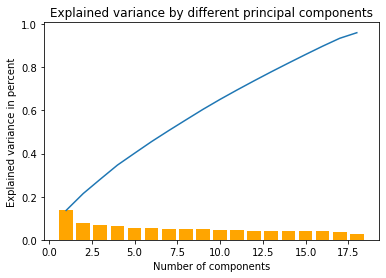

In [47]:
X_train_pca_STFWI, X_test_pca_STFWI = makePCA(X_train_STFWI, X_test_STFWI)

PCA result on non-encoded dataset:

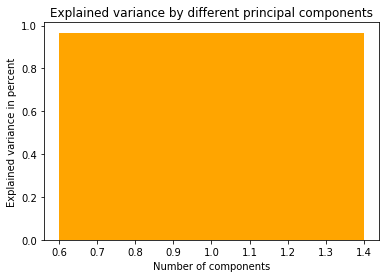

In [48]:
X_train_pca_STFWI_DT, X_test_pca_STFWI_DT = makePCA(X_train_STFWI_DT, X_test_STFWI_DT)

**Linear Regression**

In [49]:
print("With PCA:")
lr_pca_RMSE_STFWI, lr_pca_MAE_STFWI = makeLinearRegression(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)

With PCA:
Test results:
	RMSE: 92.09804611979868
	MAE: 18.276190422599523
Train results:
	RMSE: 47.822002215774575
	MAE: 10.463032320714438


In [50]:
print("Without PCA:")
lr_RMSE_STFWI, lr_MAE_STFWI = makeLinearRegression(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

Without PCA:
Test results:
	RMSE: 92.06264568174554
	MAE: 18.242859591561803
Train results:
	RMSE: 47.76064651238475
	MAE: 10.442574000576192


**Regression Tree**

With PCA:
Test results:
	RMSE: 92.28382679813572
	MAE: 18.29551588552271
Train results:
	RMSE: 47.84999393117771
	MAE: 10.570187747743914


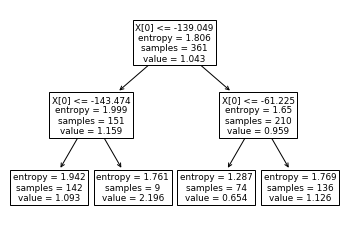

In [51]:
print("With PCA:")
dt_pca_RMSE_STFWI, dt_pca_MAE_STFWI = makeDecisionTree(X_train_pca_STFWI_DT, Y_train_STFWI_DT, Y_train_STFWI_post_DT, X_test_pca_STFWI_DT, Y_test_STFWI_post_DT)

Without PCA:
Test results:
	RMSE: 92.1534408286682
	MAE: 18.163754142415733
Train results:
	RMSE: 47.86122163700555
	MAE: 10.675793677767238


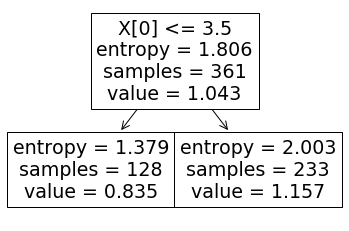

In [52]:
print("Without PCA:")
dt_RMSE_STFWI, dt_MAE_STFWI = makeDecisionTree(X_train_STFWI_DT, Y_train_STFWI_DT, Y_train_STFWI_post_DT, X_test_STFWI_DT, Y_test_STFWI_post_DT)

**Random forest**

In [53]:
print("With PCA:")
rf_pca_RMSE_STFWI, rf_pca_MAE_STFWI = makeRandomForest(X_train_pca_STFWI_DT, Y_train_STFWI_DT, Y_train_STFWI_post_DT, X_test_pca_STFWI_DT, Y_test_STFWI_post_DT)

With PCA:
Test results:
	RMSE: 92.18654884394975
	MAE: 18.230246495315267
Train results:
	RMSE: 47.8320501561482
	MAE: 10.597426980064537


In [54]:
print("Without PCA:")
rf_RMSE_STFWI, rf_MAE_STFWI = makeRandomForest(X_train_STFWI_DT, Y_train_STFWI_DT, Y_train_STFWI_post_DT, X_test_STFWI_DT, Y_test_STFWI_post_DT)

Without PCA:
Test results:
	RMSE: 92.17684884377374
	MAE: 18.16940410029728
Train results:
	RMSE: 47.855707813604134
	MAE: 10.660300761450566


**SVR**

In [55]:
print("With PCA:")
svr_pca_RMSE_STFWI, svr_pca_MAE_STFWI = makeSVR(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)

With PCA:
Best parameters:  {'C': 1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 92.19075844134152
	MAE: 18.144698885351147
Train results:
	RMSE: 47.88064018242756
	MAE: 10.548123764732228


In [56]:
print("Without PCA:")
svr_RMSE_STFWI, svr_MAE_STFWI = makeSVR(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

Without PCA:
Best parameters:  {'C': 1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 92.1893968368175
	MAE: 18.146836588712883
Train results:
	RMSE: 47.87699909853546
	MAE: 10.540103769320037


**K-NN**

In [57]:
print("With PCA:")
knn_pca_RMSE_STFWI, knn_pca_MAE_STFWI = makeKNN(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)

With PCA:
Test results:
	RMSE: 92.17861023978627
	MAE: 18.275310463596934
Train results:
	RMSE: 47.80828814035402
	MAE: 10.493417895710962


In [58]:
print("Without PCA:")
knn_RMSE_STFWI, knn_MAE_STFWI = makeKNN(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

Without PCA:
Test results:
	RMSE: 92.21549621508878
	MAE: 18.233736182895292
Train results:
	RMSE: 47.83659520478579
	MAE: 10.514280215179932


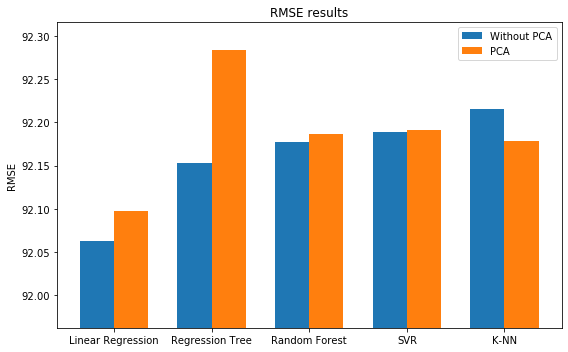

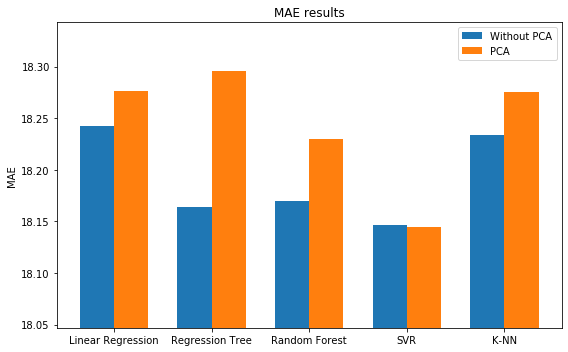

In [159]:
RMSEs = [lr_RMSE_STFWI, dt_RMSE_STFWI, rf_RMSE_STFWI, svr_RMSE_STFWI, knn_RMSE_STFWI]  
MAEs = [lr_MAE_STFWI, dt_MAE_STFWI, rf_MAE_STFWI, svr_MAE_STFWI, knn_MAE_STFWI]
RMSEs_pca = [lr_pca_RMSE_STFWI, dt_pca_RMSE_STFWI, rf_pca_RMSE_STFWI, svr_pca_RMSE_STFWI, knn_pca_RMSE_STFWI] 
MAEs_pca = [lr_pca_MAE_STFWI, dt_pca_MAE_STFWI, rf_pca_MAE_STFWI, svr_pca_MAE_STFWI, knn_pca_MAE_STFWI]
plotResult(RMSEs, RMSEs_pca, MAEs, MAEs_pca)

### 5.2 STM <a class="anchor" id="5.2"></a>

STM – with the spatial, temporal and the four weather variables:
- X
- Y
- month
- day 
- temp
- RH
- wind
- rain

In [61]:
X_STM = df_dummy.drop(columns=['FFMC', 'DMC', 'DC', 'ISI', 'area']).values
X_STM_DT = df.drop(columns=['FFMC', 'DMC', 'DC', 'ISI', 'area']).values
Y_STM = df['area'].values

In [62]:
X_train_STM, X_test_STM, Y_train_STM, Y_test_STM = train_test_split( X_STM, Y_STM, test_size=0.30, random_state=0)
X_train_STM_DT, X_test_STM_DT, Y_train_STM_DT, Y_test_STM_DT = train_test_split( X_STM_DT, Y_STM, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STM)
# Apply transform to both the training set and the test set.
X_train_STM = scaler.transform(X_train_STM)
X_test_STM = scaler.transform(X_test_STM)

In [63]:
# Pre-compute post-processed Ys
Y_train_STM_post = np.expm1(Y_train_STM)
Y_test_STM_post = np.expm1(Y_test_STM)
Y_train_STM_post_DT = np.expm1(Y_train_STM_DT)
Y_test_STM_post_DT = np.expm1(Y_test_STM_DT)

**PCA**

PCA result on encoded dataset:

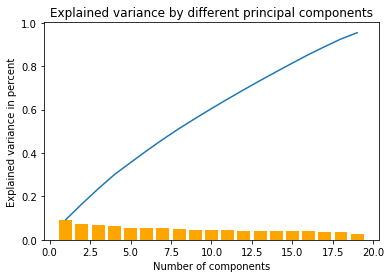

In [64]:
X_train_pca_STM, X_test_pca_STM = makePCA(X_train_STM, X_test_STM)

PCA result on non-encoded dataset:

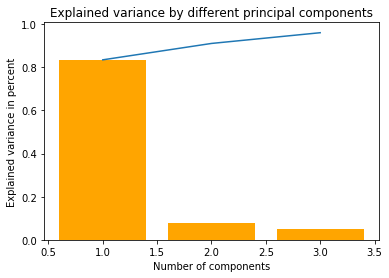

In [65]:
X_train_pca_STM_DT, X_test_pca_STM_DT = makePCA(X_train_STM_DT, X_test_STM_DT)

**Linear Regression**

In [66]:
print("With PCA:")
lr_pca_RMSE_STM, lr_pca_MAE_STM = makeLinearRegression(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)

With PCA:
Test results:
	RMSE: 92.07067815597615
	MAE: 18.23155904502224
Train results:
	RMSE: 47.80759569308062
	MAE: 10.422990725301927


In [67]:
print("Without PCA:")
lr_RMSE_STM, lr_MAE_STM = makeLinearRegression(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

Without PCA:
Test results:
	RMSE: 92.0544939117792
	MAE: 18.209108478441124
Train results:
	RMSE: 47.78548239358368
	MAE: 10.449810421505488


**Regression Tree**

With PCA:
Test results:
	RMSE: 92.18777484844681
	MAE: 18.194978017703924
Train results:
	RMSE: 47.86818647077756
	MAE: 10.525346929319074


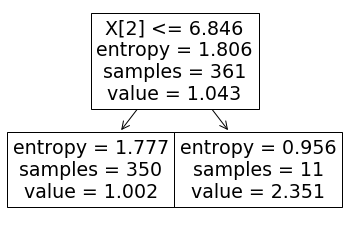

In [68]:
print("With PCA:")
dt_pca_RMSE_STM, dt_pca_MAE_STM = makeDecisionTree(X_train_pca_STM_DT, Y_train_STM_DT, Y_train_STM_post_DT, X_test_pca_STM_DT, Y_test_STM_post_DT)

Without PCA:
Test results:
	RMSE: 92.19426376330951
	MAE: 18.144097757825712
Train results:
	RMSE: 47.88401023866266
	MAE: 10.509331374642663


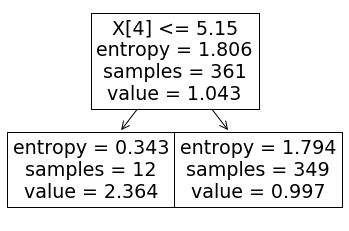

In [69]:
print("Without PCA:")
dt_RMSE_STM, dt_MAE_STM = makeDecisionTree(X_train_STM_DT, Y_train_STM_DT, Y_train_STM_post_DT, X_test_STM_DT, Y_test_STM_post_DT)

**Random Forest**

In [70]:
print("With PCA:")
rf_pca_RMSE_STM, rf_pca_MAE_STM = makeRandomForest(X_train_pca_STM_DT, Y_train_STM_DT, Y_train_STM_post_DT, X_test_pca_STM_DT, Y_test_STM_post_DT)

With PCA:
Test results:
	RMSE: 92.18145045291942
	MAE: 18.1191651677869
Train results:
	RMSE: 47.87059783372824
	MAE: 10.55775482783465


In [71]:
print("Without PCA:")
rf_RMSE_STM, rf_MAE_STM = makeRandomForest(X_train_STM_DT, Y_train_STM_DT, Y_train_STM_post_DT, X_test_STM_DT, Y_test_STM_post_DT)

Without PCA:
Test results:
	RMSE: 92.18925381488398
	MAE: 18.127337148490394
Train results:
	RMSE: 47.862238167157194
	MAE: 10.550997586441582


**SVR**

In [72]:
print("With PCA:")
svr_pca_RMSE_STM, svr_pca_MAE_STM = makeSVR(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)

With PCA:
Best parameters:  {'C': 1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 92.18872521229387
	MAE: 18.15247373337553
Train results:
	RMSE: 47.87435708550736
	MAE: 10.547686500359086


In [73]:
print("Without PCA:")
svr_RMSE_STM, svr_MAE_STM = makeSVR(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

Without PCA:
Best parameters:  {'C': 1, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Test results:
	RMSE: 92.1890406476972
	MAE: 18.143133821760543
Train results:
	RMSE: 47.871771756677944
	MAE: 10.537665564445534


**K-NN**

In [74]:
print("With PCA:")
knn_pca_RMSE_STM, knn_pca_MAE_STM = makeKNN(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)

With PCA:
Test results:
	RMSE: 92.22750982682116
	MAE: 18.34185561725789
Train results:
	RMSE: 47.77382155552341
	MAE: 10.55750788431901


In [75]:
print("Without PCA:")
knn_RMSE_STM, knn_MAE_STM = makeKNN(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

Without PCA:
Test results:
	RMSE: 92.16657420862175
	MAE: 18.296220843035943
Train results:
	RMSE: 47.812891280209364
	MAE: 10.533118013167966


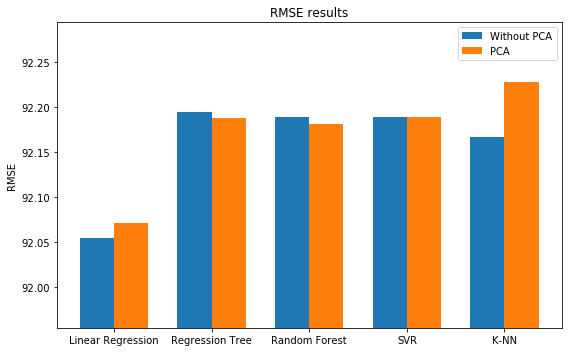

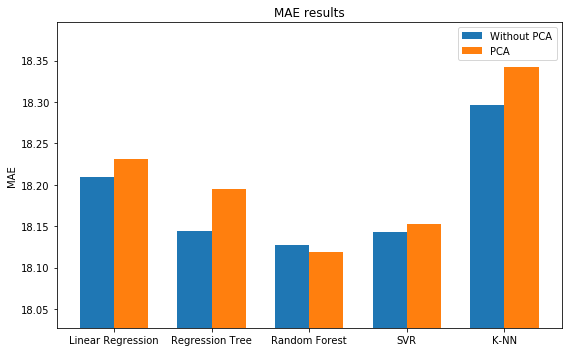

In [160]:
RMSEs = [lr_RMSE_STM, dt_RMSE_STM, rf_RMSE_STM, svr_RMSE_STM, knn_RMSE_STM]  
MAEs = [lr_MAE_STM, dt_MAE_STM, rf_MAE_STM, svr_MAE_STM, knn_MAE_STM]
RMSEs_pca = [lr_pca_RMSE_STM, dt_pca_RMSE_STM, rf_pca_RMSE_STM, svr_pca_RMSE_STM, knn_pca_RMSE_STM] 
MAEs_pca = [lr_pca_MAE_STM, dt_pca_MAE_STM, rf_pca_MAE_STM, svr_pca_MAE_STM, knn_pca_MAE_STM]
plotResult(RMSEs, RMSEs_pca, MAEs, MAEs_pca)

### 5.3 FWI <a class="anchor" id="5.3"></a>

FWI – using only the four FWI components:
- FFMC
- DMC
- DC
- ISI

In [78]:
X_FWI = df_dummy[['FFMC', 'DMC', 'DC', 'ISI']].values
X_FWI_DT = df[['FFMC', 'DMC', 'DC', 'ISI']].values
Y_FWI = df['area'].values

In [79]:
X_train_FWI, X_test_FWI, Y_train_FWI, Y_test_FWI = train_test_split( X_FWI, Y_FWI, test_size=0.30, random_state=0)
X_train_FWI_DT, X_test_FWI_DT, Y_train_FWI_DT, Y_test_FWI_DT = train_test_split( X_FWI_DT, Y_FWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_FWI)
# Apply transform to both the training set and the test set.
X_train_FWI = scaler.transform(X_train_FWI)
X_test_FWI = scaler.transform(X_test_FWI)

In [80]:
# Pre-compute post-processed Ys
Y_train_FWI_post = np.expm1(Y_train_FWI)
Y_test_FWI_post = np.expm1(Y_test_FWI)
Y_train_FWI_post_DT = np.expm1(Y_train_FWI_DT)
Y_test_FWI_post_DT = np.expm1(Y_test_FWI_DT)

**PCA**

PCA result on encoded dataset:

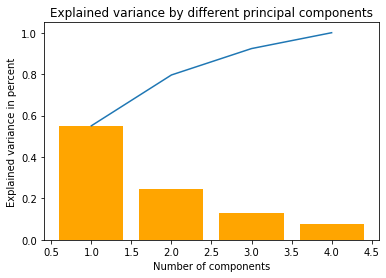

In [81]:
X_train_pca_FWI, X_test_pca_FWI = makePCA(X_train_FWI, X_test_FWI)

PCA result on non-encoded dataset:

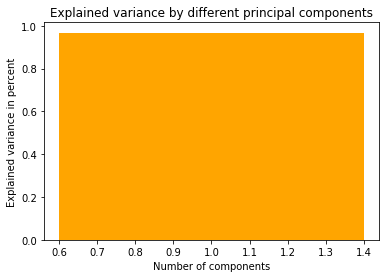

In [82]:
X_train_pca_FWI_DT, X_test_pca_FWI_DT = makePCA(X_train_FWI_DT, X_test_FWI_DT)

**Linear Regression**

In [83]:
print("With PCA:")
lr_pca_RMSE_FWI, lr_pca_MAE_FWI = makeLinearRegression(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)

With PCA:
Test results:
	RMSE: 92.17489502021802
	MAE: 18.14452247410045
Train results:
	RMSE: 47.8887552767897
	MAE: 10.688915710763094


In [84]:
print("Without PCA:")
lr_RMSE_FWI, lr_MAE_FWI = makeLinearRegression(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

Without PCA:
Test results:
	RMSE: 92.17489502021802
	MAE: 18.14452247410045
Train results:
	RMSE: 47.8887552767897
	MAE: 10.688915710763094


**Regression Tree**

With PCA:
Test results:
	RMSE: 92.17810205435904
	MAE: 18.171201549704158
Train results:
	RMSE: 47.893832373701514
	MAE: 10.651187785156694


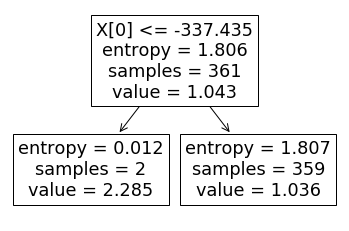

In [85]:
print("With PCA:")
dt_pca_RMSE_FWI, dt_pca_MAE_FWI = makeDecisionTree(X_train_pca_FWI_DT, Y_train_FWI_DT, Y_train_FWI_post_DT, X_test_pca_FWI_DT, Y_test_FWI_post_DT)

Without PCA:
Test results:
	RMSE: 92.1912625072396
	MAE: 18.21160155298063
Train results:
	RMSE: 47.895622555763
	MAE: 10.663093745543943


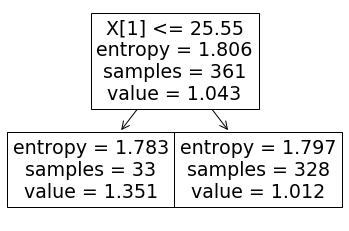

In [86]:
print("Without PCA:")
dt_RMSE_FWI, dt_MAE_FWI = makeDecisionTree(X_train_FWI_DT, Y_train_FWI_DT, Y_train_FWI_post_DT, X_test_FWI_DT, Y_test_FWI_post_DT)

**Random Forest**

In [87]:
print("With PCA:")
rf_pca_RMSE_FWI, rf_pca_MAE_FWI = makeRandomForest(X_train_pca_FWI_DT, Y_train_FWI_DT, Y_train_FWI_post_DT, X_test_pca_FWI_DT, Y_test_FWI_post_DT)

With PCA:
Test results:
	RMSE: 92.18910135779149
	MAE: 18.236221760422538
Train results:
	RMSE: 47.82938571655599
	MAE: 10.61421980198033


In [88]:
print("Without PCA:")
rf_RMSE_FWI, rf_MAE_FWI = makeRandomForest(X_train_FWI_DT, Y_train_FWI_DT, Y_train_FWI_post_DT, X_test_FWI_DT, Y_test_FWI_post_DT)

Without PCA:
Test results:
	RMSE: 92.1868393029234
	MAE: 18.183058618901264
Train results:
	RMSE: 47.87167574081417
	MAE: 10.664150986471434


**SVR**

In [89]:
print("With PCA:")
svr_pca_RMSE_FWI, svr_pca_MAE_FWI = makeSVR(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)

With PCA:
Best parameters:  {'C': 0.1, 'epsilon': 1, 'gamma': 10, 'kernel': 'rbf'}
Test results:
	RMSE: 92.1920051208099
	MAE: 18.17890528687977
Train results:
	RMSE: 47.87627441651397
	MAE: 10.60414871550452


In [90]:
print("Without PCA:")
svr_RMSE_FWI, svr_MAE_FWI = makeSVR(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

Without PCA:
Best parameters:  {'C': 0.1, 'epsilon': 1, 'gamma': 10, 'kernel': 'rbf'}
Test results:
	RMSE: 92.1920051208099
	MAE: 18.17890528687977
Train results:
	RMSE: 47.87627441651397
	MAE: 10.60414871550452


**K-NN**

In [91]:
print("With PCA:")
knn_pca_RMSE_FWI, knn_pca_MAE_FWI = makeKNN(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)

With PCA:
Test results:
	RMSE: 92.17918409397562
	MAE: 18.20113608168683
Train results:
	RMSE: 47.82051508386746
	MAE: 10.565119096419474


In [92]:
print("Without PCA:")
knn_RMSE_FWI, knn_MAE_FWI = makeKNN(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

Without PCA:
Test results:
	RMSE: 92.12769624757304
	MAE: 18.285256496424015
Train results:
	RMSE: 47.787251712190525
	MAE: 10.565109730601439


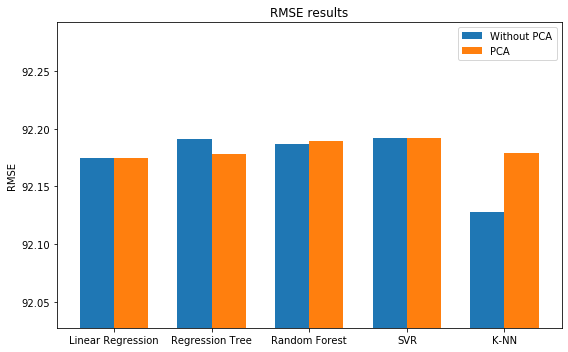

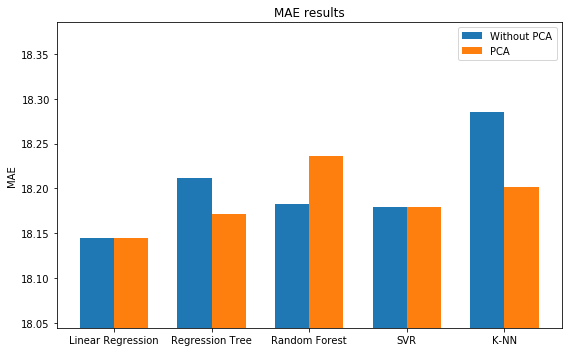

In [162]:
RMSEs = [lr_RMSE_FWI, dt_RMSE_FWI, rf_RMSE_FWI, svr_RMSE_FWI, knn_RMSE_FWI]  
MAEs = [lr_MAE_FWI, dt_MAE_FWI, rf_MAE_FWI, svr_MAE_FWI, knn_MAE_FWI]
RMSEs_pca = [lr_pca_RMSE_FWI, dt_pca_RMSE_FWI, rf_pca_RMSE_FWI, svr_pca_RMSE_FWI, knn_pca_RMSE_FWI] 
MAEs_pca = [lr_pca_MAE_FWI, dt_pca_MAE_FWI, rf_pca_MAE_FWI, svr_pca_MAE_FWI, knn_pca_MAE_FWI]
plotResult(RMSEs, RMSEs_pca, MAEs, MAEs_pca)

### 5.4 Weather Conditions <a class="anchor" id="5.4"></a>

M – with the weather conditions:
- temp
- RH
- wind
- rain

In [95]:
X_M = df_dummy[['temp', 'RH', 'wind', 'rain']].values
X_M_DT = df[['temp', 'RH', 'wind', 'rain']].values
Y_M = df['area'].values

In [96]:
X_train_M, X_test_M, Y_train_M, Y_test_M = train_test_split( X_M, Y_M, test_size=0.30, random_state=0)
X_train_M_DT, X_test_M_DT, Y_train_M_DT, Y_test_M_DT = train_test_split( X_M_DT, Y_M, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_M)
# Apply transform to both the training set and the test set.
X_train_M = scaler.transform(X_train_M)
X_test_M = scaler.transform(X_test_M)

In [97]:
# Pre-compute post-processed Ys
Y_train_M_post = np.expm1(Y_train_M)
Y_test_M_post = np.expm1(Y_test_M)
Y_train_M_post_DT = np.expm1(Y_train_M_DT)
Y_test_M_post_DT = np.expm1(Y_test_M_DT)

**PCA**

PCA result on encoded dataset:

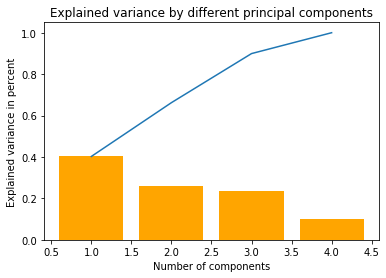

In [98]:
X_train_pca_M, X_test_pca_M = makePCA(X_train_M, X_test_M)

PCA result on non-encoded dataset:

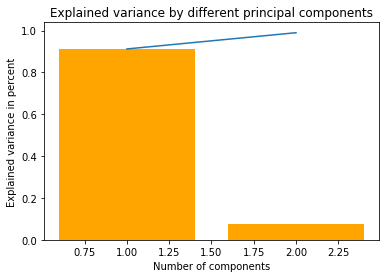

In [99]:
X_train_pca_M_DT, X_test_pca_M_DT = makePCA(X_train_M_DT, X_test_M_DT)

**Linear Regression**

In [100]:
print("With PCA:")
lr_pca_RMSE_M, lr_pca_MAE_M = makeLinearRegression(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)

With PCA:
Test results:
	RMSE: 92.18185748622761
	MAE: 18.170104011501774
Train results:
	RMSE: 47.89579953820803
	MAE: 10.658782974931215


In [101]:
print("Without PCA:")
lr_RMSE_M, lr_MAE_M = makeLinearRegression(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

Without PCA:
Test results:
	RMSE: 92.18185748622761
	MAE: 18.170104011501774
Train results:
	RMSE: 47.89579953820803
	MAE: 10.658782974931215


**Regression Tree**

With PCA:
Test results:
	RMSE: 92.18137650103888
	MAE: 18.147187235768843
Train results:
	RMSE: 47.88990779091821
	MAE: 10.556445039492981


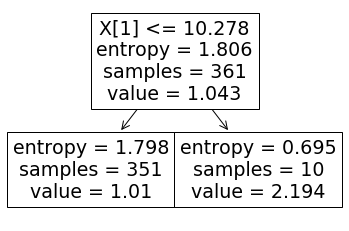

In [102]:
print("With PCA:")
dt_pca_RMSE_M, dt_pca_MAE_M = makeDecisionTree(X_train_pca_M_DT, Y_train_M_DT, Y_train_M_post_DT, X_test_pca_M_DT, Y_test_M_post_DT)

Without PCA:
Test results:
	RMSE: 92.19426376330951
	MAE: 18.144097757825712
Train results:
	RMSE: 47.88401023866266
	MAE: 10.509331374642663


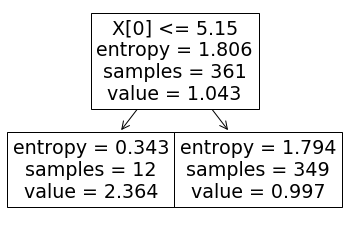

In [103]:
print("Without PCA:")
dt_RMSE_M, dt_MAE_M = makeDecisionTree(X_train_M_DT, Y_train_M_DT, Y_train_M_post_DT, X_test_M_DT, Y_test_M_post_DT)

**Random Forest**

In [104]:
print("With PCA:")
rf_pca_RMSE_M, rf_pca_MAE_M = makeRandomForest(X_train_pca_M_DT, Y_train_M_DT, Y_train_M_post_DT, X_test_pca_M_DT, Y_test_M_post_DT)

With PCA:
Test results:
	RMSE: 92.17101438184025
	MAE: 18.131404837865894
Train results:
	RMSE: 47.85862666799966
	MAE: 10.625890475574074


In [105]:
print("Without PCA:")
rf_RMSE_M, rf_MAE_M = makeRandomForest(X_train_M_DT, Y_train_M_DT, Y_train_M_post_DT, X_test_M_DT, Y_test_M_post_DT)

Without PCA:
Test results:
	RMSE: 92.18151152369643
	MAE: 18.12045597944947
Train results:
	RMSE: 47.86274519691106
	MAE: 10.55327765351881


**SVR**

In [106]:
print("With PCA:")
svr_pca_RMSE_M, svr_pca_MAE_M = makeSVR(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)

With PCA:
Best parameters:  {'C': 1, 'epsilon': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test results:
	RMSE: 92.195116783844
	MAE: 18.12367201082658
Train results:
	RMSE: 47.902368555334554
	MAE: 10.61896968776632


In [107]:
print("Without PCA:")
svr_RMSE_M, svr_MAE_M = makeSVR(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

Without PCA:
Best parameters:  {'C': 1, 'epsilon': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test results:
	RMSE: 92.195116783844
	MAE: 18.123672010826578
Train results:
	RMSE: 47.902368555334554
	MAE: 10.61896968776632


**K-NN**

In [108]:
print("With PCA:")
knn_pca_RMSE_M, knn_pca_MAE_M = makeKNN(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)

With PCA:
Test results:
	RMSE: 92.27783273288235
	MAE: 18.186929270532573
Train results:
	RMSE: 47.73795908470802
	MAE: 10.617567433106478


In [109]:
print("Without PCA:")
knn_RMSE_M, knn_MAE_M =makeKNN(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

Without PCA:
Test results:
	RMSE: 92.2322017560715
	MAE: 18.06588778938964
Train results:
	RMSE: 47.70561177734654
	MAE: 10.597588390015623


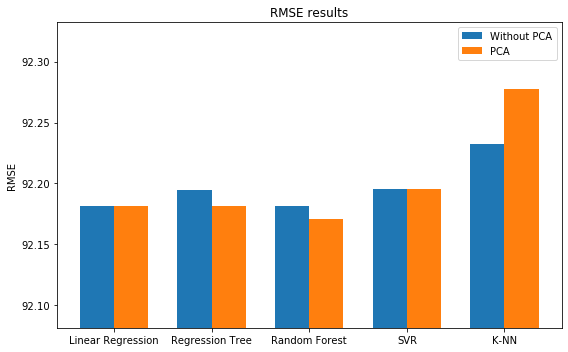

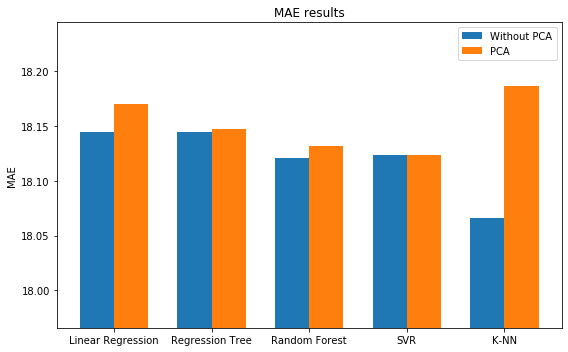

In [163]:
RMSEs = [lr_RMSE_M, dt_RMSE_M, rf_RMSE_M, svr_RMSE_M, knn_RMSE_M]  
MAEs = [lr_MAE_FWI, dt_MAE_M, rf_MAE_M, svr_MAE_M, knn_MAE_M]
RMSEs_pca = [lr_pca_RMSE_M, dt_pca_RMSE_M, rf_pca_RMSE_M, svr_pca_RMSE_M, knn_pca_RMSE_M] 
MAEs_pca = [lr_pca_MAE_M, dt_pca_MAE_M, rf_pca_MAE_M, svr_pca_MAE_M, knn_pca_MAE_M]
plotResult(RMSEs, RMSEs_pca, MAEs, MAEs_pca)

______________________________________________

## 6. Conclusions <a class="anchor" id="6"></a>

Here is a summary of obtained resuslts divided by metrics and PCA/non-PCA:

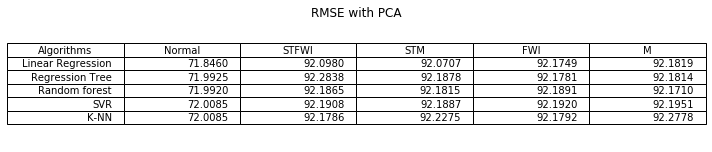

In [126]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', '{:0.4f}'.format(lr_pca_RMSE), '{:0.4f}'.format(lr_pca_RMSE_STFWI), '{:0.4f}'.format(lr_pca_RMSE_STM), '{:0.4f}'.format(lr_pca_RMSE_FWI), '{:0.4f}'.format(lr_pca_RMSE_M)],
         ['Regression Tree', '{:0.4f}'.format(dt_pca_RMSE), '{:0.4f}'.format(dt_pca_RMSE_STFWI), '{:0.4f}'.format(dt_pca_RMSE_STM), '{:0.4f}'.format(dt_pca_RMSE_FWI), '{:0.4f}'.format(dt_pca_RMSE_M)],
         ['Random forest', '{:0.4f}'.format(rf_pca_RMSE), '{:0.4f}'.format(rf_pca_RMSE_STFWI), '{:0.4f}'.format(rf_pca_RMSE_STM), '{:0.4f}'.format(rf_pca_RMSE_FWI), '{:0.4f}'.format(rf_pca_RMSE_M)],
         ['SVR', '{:0.4f}'.format(svr_pca_RMSE), '{:0.4f}'.format(svr_pca_RMSE_STFWI), '{:0.4f}'.format(svr_pca_RMSE_STM), '{:0.4f}'.format(svr_pca_RMSE_FWI), '{:0.4f}'.format(svr_pca_RMSE_M)],
         ['K-NN', '{:0.4f}'.format(knn_pca_RMSE), '{:0.4f}'.format(knn_pca_RMSE_STFWI), '{:0.4f}'.format(knn_pca_RMSE_STM), '{:0.4f}'.format(knn_pca_RMSE_FWI), '{:0.4f}'.format(knn_pca_RMSE_M)]]
fig, ax = plt.subplots(figsize=(10,2))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.title("RMSE with PCA")
plt.show()

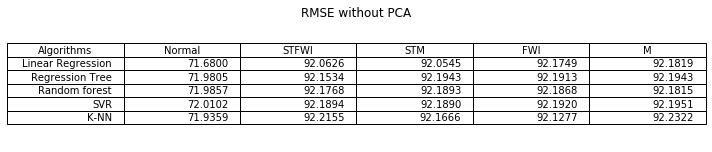

In [121]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', '{:0.4f}'.format(lr_RMSE), '{:0.4f}'.format(lr_RMSE_STFWI), '{:0.4f}'.format(lr_RMSE_STM), '{:0.4f}'.format(lr_RMSE_FWI), '{:0.4f}'.format(lr_RMSE_M)],
         ['Regression Tree', '{:0.4f}'.format(dt_RMSE), '{:0.4f}'.format(dt_RMSE_STFWI), '{:0.4f}'.format(dt_RMSE_STM), '{:0.4f}'.format(dt_RMSE_FWI), '{:0.4f}'.format(dt_RMSE_M)],
         ['Random forest', '{:0.4f}'.format(rf_RMSE), '{:0.4f}'.format(rf_RMSE_STFWI), '{:0.4f}'.format(rf_RMSE_STM), '{:0.4f}'.format(rf_RMSE_FWI), '{:0.4f}'.format(rf_RMSE_M)],
         ['SVR', '{:0.4f}'.format(svr_RMSE), '{:0.4f}'.format(svr_RMSE_STFWI), '{:0.4f}'.format(svr_RMSE_STM), '{:0.4f}'.format(svr_RMSE_FWI), '{:0.4f}'.format(svr_RMSE_M)],
         ['K-NN', '{:0.4f}'.format(knn_RMSE), '{:0.4f}'.format(knn_RMSE_STFWI), '{:0.4f}'.format(knn_RMSE_STM), '{:0.4f}'.format(knn_RMSE_FWI), '{:0.4f}'.format(knn_RMSE_M)]]
fig, ax = plt.subplots(figsize=(10,2))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.title("RMSE without PCA")
plt.show()

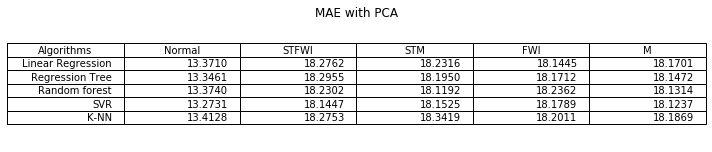

In [117]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', '{:0.4f}'.format(lr_pca_MAE), '{:0.4f}'.format(lr_pca_MAE_STFWI), '{:0.4f}'.format(lr_pca_MAE_STM), '{:0.4f}'.format(lr_pca_MAE_FWI), '{:0.4f}'.format(lr_pca_MAE_M)],
         ['Regression Tree', '{:0.4f}'.format(dt_pca_MAE), '{:0.4f}'.format(dt_pca_MAE_STFWI), '{:0.4f}'.format(dt_pca_MAE_STM), '{:0.4f}'.format(dt_pca_MAE_FWI), '{:0.4f}'.format(dt_pca_MAE_M)],
         ['Random forest', '{:0.4f}'.format(rf_pca_MAE), '{:0.4f}'.format(rf_pca_MAE_STFWI), '{:0.4f}'.format(rf_pca_MAE_STM), '{:0.4f}'.format(rf_pca_MAE_FWI), '{:0.4f}'.format(rf_pca_MAE_M)],
         ['SVR', '{:0.4f}'.format(svr_pca_MAE), '{:0.4f}'.format(svr_pca_MAE_STFWI), '{:0.4f}'.format(svr_pca_MAE_STM), '{:0.4f}'.format(svr_pca_MAE_FWI), '{:0.4f}'.format(svr_pca_MAE_M)],
         ['K-NN', '{:0.4f}'.format(knn_pca_MAE), '{:0.4f}'.format(knn_pca_MAE_STFWI), '{:0.4f}'.format(knn_pca_MAE_STM), '{:0.4f}'.format(knn_pca_MAE_FWI), '{:0.4f}'.format(knn_pca_MAE_M)]]
fig, ax = plt.subplots(figsize=(10,2))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.title("MAE with PCA")
plt.show()

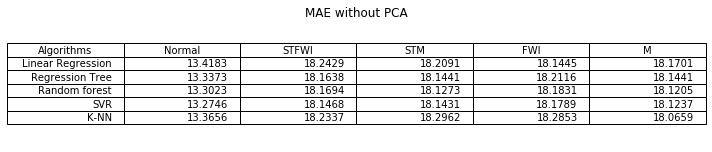

In [120]:
columns = [ 'Algorithms' ,'Normal', 'STFWI', 'STM', 'FWI', 'M']
values = [['Linear Regression', '{:0.4f}'.format(lr_MAE), '{:0.4f}'.format(lr_MAE_STFWI), '{:0.4f}'.format(lr_MAE_STM), '{:0.4f}'.format(lr_MAE_FWI), '{:0.4f}'.format(lr_MAE_M)],
         ['Regression Tree', '{:0.4f}'.format(dt_MAE), '{:0.4f}'.format(dt_MAE_STFWI), '{:0.4f}'.format(dt_MAE_STM), '{:0.4f}'.format(dt_MAE_FWI), '{:0.4f}'.format(dt_MAE_M)],
         ['Random forest', '{:0.4f}'.format(rf_MAE), '{:0.4f}'.format(rf_MAE_STFWI), '{:0.4f}'.format(rf_MAE_STM), '{:0.4f}'.format(rf_MAE_FWI), '{:0.4f}'.format(rf_MAE_M)],
         ['SVR', '{:0.4f}'.format(svr_MAE), '{:0.4f}'.format(svr_MAE_STFWI), '{:0.4f}'.format(svr_MAE_STM), '{:0.4f}'.format(svr_MAE_FWI), '{:0.4f}'.format(svr_MAE_M)],
         ['K-NN', '{:0.4f}'.format(knn_MAE), '{:0.4f}'.format(knn_MAE_STFWI), '{:0.4f}'.format(knn_MAE_STM), '{:0.4f}'.format(knn_MAE_FWI), '{:0.4f}'.format(knn_MAE_M)]]
fig, ax = plt.subplots(figsize=(10,2))
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center')
fig.tight_layout()
plt.title("MAE without PCA")
plt.show()

In general, our models performed in similar ways, relatively to each features selection. The normal dataset (i.e.: the one with all features) generalizes better then other ones, given the fact that this dataset was generated ad hoc for this kind of prediction, starting from different sources.

Our analysis was based on two different types of metrics (i.e.: MAE, RMSE). Results are quite different, depending on considered metric. One of the reasons is that RMSE is more sensitive to high errors.

The purpose of referenced paper was to demonstrate that burnt area can be predicted only from metereological data. We confirmed their thesis, obtaining good results with all algorithms and "M" feature selection. In this case, the best performing algorithm was Random Forest.